In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import rawpy
import os
import numpy as np
#import skimage.io as io
import SimpleITK as sltk
import matplotlib.animation as animation
import imageio
import cv2
from IPython.display import Image
import warnings
import multiprocessing
import glob
import random
from matplotlib import cm
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
num_cores = multiprocessing.cpu_count()-3
print(num_cores)

9


In [3]:
a='D:/Data Science Bowl 2017/LUNA Dataset/subset1/subset1/1.3.6.1.4.1.14519.5.2.1.6279.6001.128881800399702510818644205032.mhd'
b='D:/Data Science Bowl 2017/LUNA Dataset/subset0/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.154677396354641150280013275227.mhd'
c='D:/Data Science Bowl 2017/LUNA Dataset/subset0/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.269689294231892620436462818860.mhd'
nda0=sltk.ReadImage(a)
nda=sltk.GetArrayFromImage(nda0)

In [4]:
def resample_image(itk_image, out_spacing=(1.0, 1.0, 1.0), is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()

    out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
                int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
                int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]

    resample = sltk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sltk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sltk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sltk.sitkBSpline)

    return resample.Execute(itk_image)

In [5]:
img=resample_image(sltk.ReadImage(a))
img=sltk.GetArrayFromImage(img)
img.shape

(328, 400, 400)

In [6]:
#Bones Only
img_b=resample_image(sltk.ReadImage(a))
img_b=sltk.GetArrayFromImage(img_b)
img_b[img_b<500]=-2047
#img[img>-300]=-2047

In [7]:
#Water and Blood
img_wb=resample_image(sltk.ReadImage(a))
img_wb=sltk.GetArrayFromImage(img_wb)
img_wb[img_wb<-50]=-2047
img_wb[img_wb>50]=-2047

In [8]:
#Lung Tissues
img_lt=resample_image(sltk.ReadImage(a))
img_lt=sltk.GetArrayFromImage(img_lt)
img_lt[img_lt<-800]=-2047
img_lt[img_lt>-300]=-2047

In [9]:
#Air
img_a=resample_image(sltk.ReadImage(a))
img_a=sltk.GetArrayFromImage(img_a)
img_a[img_a>-900]=-2047

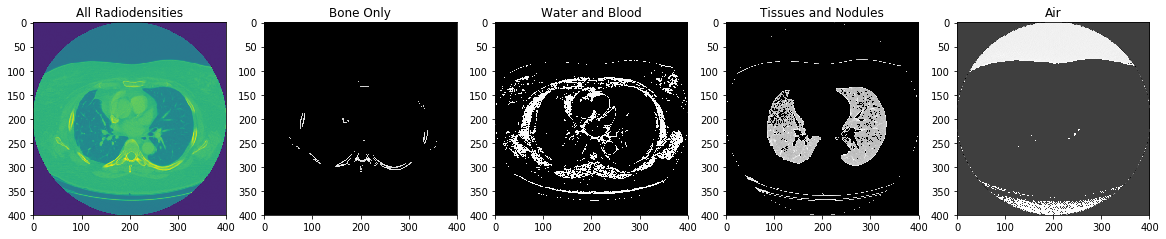

In [10]:
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(151)
ax.imshow(img[190])
ax.title.set_text('All Radiodensities')

ax = fig.add_subplot(152)
ax.imshow(img_b[190],cmap='gray')
ax.title.set_text('Bone Only')

ax = fig.add_subplot(153)
ax.imshow(img_wb[190],cmap='gray')
ax.title.set_text('Water and Blood')

ax = fig.add_subplot(154)
ax.imshow(img_lt[190],cmap='gray')
ax.title.set_text('Tissues and Nodules')

ax = fig.add_subplot(155)
ax.imshow(img_a[190],cmap='gray')
ax.title.set_text('Air')